In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
import nltk
#nltk.download("stopwords")

In [3]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import pickle
import re

In [4]:
df=pd.read_csv('jokes.csv')
df.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [5]:
df2=pd.read_csv('train.csv')
df2.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [6]:
data=pd.merge(df,df2,on='joke_id')
data.head()

,joke_id,joke_text,id,user_id,Rating
0,1,Q. What's O. J. Simpson's web address? A. Slas...,41_1,41,3.062
1,1,Q. What's O. J. Simpson's web address? A. Slas...,282_1,282,1.062
2,1,Q. What's O. J. Simpson's web address? A. Slas...,117_1,117,-8.469
3,1,Q. What's O. J. Simpson's web address? A. Slas...,259_1,259,2.688
4,1,Q. What's O. J. Simpson's web address? A. Slas...,167_1,167,8.125


In [7]:
df=data.drop('id',axis=1)
print(df.shape)
df.head()

(1092059, 4)


,joke_id,joke_text,user_id,Rating
0,1,Q. What's O. J. Simpson's web address? A. Slas...,41,3.062
1,1,Q. What's O. J. Simpson's web address? A. Slas...,282,1.062
2,1,Q. What's O. J. Simpson's web address? A. Slas...,117,-8.469
3,1,Q. What's O. J. Simpson's web address? A. Slas...,259,2.688
4,1,Q. What's O. J. Simpson's web address? A. Slas...,167,8.125


In [8]:
df3=df
df3.head()

,joke_id,joke_text,user_id,Rating
0,1,Q. What's O. J. Simpson's web address? A. Slas...,41,3.062
1,1,Q. What's O. J. Simpson's web address? A. Slas...,282,1.062
2,1,Q. What's O. J. Simpson's web address? A. Slas...,117,-8.469
3,1,Q. What's O. J. Simpson's web address? A. Slas...,259,2.688
4,1,Q. What's O. J. Simpson's web address? A. Slas...,167,8.125


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092059 entries, 0 to 1092058
Data columns (total 4 columns):
joke_id      1092059 non-null int64
joke_text    1092059 non-null object
user_id      1092059 non-null int64
Rating       1092059 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 41.7+ MB


In [10]:
ss=df3.groupby('joke_text',as_index=False).mean()
ss.head()
ss['Rating'].describe()

count    139.000000
mean       1.620978
std        1.465558
min       -2.734815
25%        0.766440
50%        1.865004
75%        2.822265
max        3.733667
Name: Rating, dtype: float64

In [11]:
def get_rating_class(rating):
    class1=0
    if(rating<=0.0):
        class1=0
    elif(rating<=1):
        class1=1
    elif(rating<=2):
        class1=2
    else:
        class1=3
    return class1

In [12]:
df3=ss

In [13]:
df3['Rate']=ss['Rating'].apply(get_rating_class)
df3.head()

,joke_text,joke_id,user_id,Rating,Rate
0,(A) The Japanese eat very little fat and suffe...,97.0,20502.093439,2.598612,3
1,"A Briton, a Frenchman and a Russian are viewin...",116.0,22536.930509,3.217258,3
2,A Czechoslovakian man felt his eyesight was gr...,78.0,20671.598637,2.317262,3
3,A Jewish young man was seeing a psychiatrist f...,27.0,19330.746230,0.043754,1
4,"A Panda walks into a bar, sits down at a table...",81.0,20123.615829,1.923169,2


In [14]:
df3['Rate'].value_counts()

3    63
2    38
0    22
1    16
Name: Rate, dtype: int64

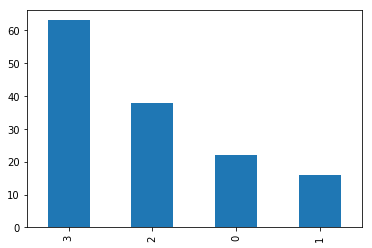

In [15]:
df3['Rate'].value_counts().plot.bar(ylim=0)
plt.show()

In [16]:
cnt_cls3,cnt_cls2,cnt_cls0,cnt_cls1=df3['Rate'].value_counts()
cls3=df3[df3['Rate']==3]
cls2=df3[df3['Rate']==2]
cls0=df3[df3['Rate']==0]
cls1=df3[df3['Rate']==1]
print(cnt_cls3,cnt_cls2,cnt_cls0,cnt_cls1)

63 38 22 16


In [17]:
class_2_ovr_smpl=cls2.sample(cnt_cls3,replace=True)
class_2_ovr_smpl.shape

(63, 5)

In [18]:
class_0_ovr_smpl=cls0.sample(cnt_cls3,replace=True)
class_0_ovr_smpl.shape

(63, 5)

In [19]:
class_1_ovr_smpl=cls1.sample(cnt_cls3,replace=True)
class_1_ovr_smpl.shape

(63, 5)

In [20]:
df_total=pd.concat([cls3,class_2_ovr_smpl,class_0_ovr_smpl,class_1_ovr_smpl])
df_total.shape

(252, 5)

In [21]:
df_total['Rate'].value_counts()

3    63
2    63
1    63
0    63
Name: Rate, dtype: int64

In [22]:
df_total.head()

,joke_text,joke_id,user_id,Rating,Rate
0,(A) The Japanese eat very little fat and suffe...,97.0,20502.093439,2.598612,3
1,"A Briton, a Frenchman and a Russian are viewin...",116.0,22536.930509,3.217258,3
2,A Czechoslovakian man felt his eyesight was gr...,78.0,20671.598637,2.317262,3
5,"A blonde, brunette, and a red head are all lin...",135.0,20038.335178,2.436230,3
7,A bus station is where a bus stops. A train st...,89.0,20313.912700,2.045504,3


In [23]:
stemmer = PorterStemmer()
words = stopwords.words("english")
df_total['cleaned'] = df_total['joke_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [24]:
df_total.head()

,joke_text,joke_id,user_id,Rating,Rate,cleaned
0,(A) The Japanese eat very little fat and suffe...,97.0,20502.093439,2.598612,3,a the japanes eat littl fat suffer fewer heart...
1,"A Briton, a Frenchman and a Russian are viewin...",116.0,22536.930509,3.217258,3,a briton frenchman russian view paint adam eve...
2,A Czechoslovakian man felt his eyesight was gr...,78.0,20671.598637,2.317262,3,a czechoslovakian man felt eyesight grow stead...
5,"A blonde, brunette, and a red head are all lin...",135.0,20038.335178,2.436230,3,a blond brunett red head line shot death fire ...
7,A bus station is where a bus stops. A train st...,89.0,20313.912700,2.045504,3,a bu station bu stop a train station train sto...


In [25]:
df_total.shape

(252, 6)

In [34]:
vectorizer = TfidfVectorizer( stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df_total['cleaned']).toarray()
final_features.shape

(252, 4966)

In [35]:
final_features[final_features>0]

array([0.19142453, 0.06606106, 0.06606106, ..., 0.24249934, 0.13649514,
       0.24249934])

In [36]:
X = final_features
Y = df_total['Rate']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.21)
y_train.value_counts()


3    51
2    51
1    50
0    47
Name: Rate, dtype: int64

In [40]:
#pipeline = Pipeline([('vect', vectorizer),
#                     ('chi',  SelectKBest(chi2, k=200)),
#                     ('clf', RandomForestClassifier())])
#model = pipeline.fit(X_train, y_train)
#with open('RandomForest.pickle', 'wb') as f:
#    pickle.dump(model, f)

In [41]:
sb=SelectKBest(chi2, k='all')
X_new = sb.fit_transform(X_train, y_train)
print(X_new.shape)
X_test_new=sb.transform(X_test)

(199, 4966)


In [42]:
dt=DecisionTreeClassifier()
dt.fit(X_new,y_train)
print('Train Score:',dt.score(X_new,y_train))
print('Test Score:',dt.score(X_test_new,y_test))

Train Score: 1.0
Test Score: 0.7547169811320755


In [43]:
ypred=dt.predict(X_test_new)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(y_test, ypred))
print(confusion_matrix(y_test,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       1.00      0.92      0.96        13
           2       0.53      0.67      0.59        12
           3       0.50      0.42      0.45        12

    accuracy                           0.75        53
   macro avg       0.74      0.74      0.74        53
weighted avg       0.76      0.75      0.76        53

[[15  0  0  1]
 [ 0 12  1  0]
 [ 0  0  8  4]
 [ 1  0  6  5]]


In [44]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_new,y_train)
print('Train Score:',rf.score(X_new,y_train))
print('Test Score:',rf.score(X_test_new,y_test))

Train Score: 1.0
Test Score: 0.8490566037735849


In [45]:
ypred=rf.predict(X_test_new)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(y_test, ypred))
print(confusion_matrix(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       1.00      0.92      0.96        13
           2       0.89      0.67      0.76        12
           3       0.71      0.83      0.77        12

    accuracy                           0.85        53
   macro avg       0.86      0.84      0.84        53
weighted avg       0.86      0.85      0.85        53

[[15  0  0  1]
 [ 1 12  0  0]
 [ 1  0  8  3]
 [ 1  0  1 10]]


In [46]:
mnb=MultinomialNB(alpha=0)
mnb.fit(X_new,y_train)
print('Train Score:',mnb.score(X_new,y_train))
print('Test Score:',mnb.score(X_test_new,y_test))

Train Score: 1.0
Test Score: 0.8490566037735849


In [47]:
ypred=mnb.predict(X_test_new)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(y_test, ypred))
print(confusion_matrix(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      0.92      0.96        13
           2       0.80      0.67      0.73        12
           3       0.62      0.83      0.71        12

    accuracy                           0.85        53
   macro avg       0.86      0.84      0.84        53
weighted avg       0.87      0.85      0.85        53

[[15  0  0  1]
 [ 0 12  0  1]
 [ 0  0  8  4]
 [ 0  0  2 10]]


In [36]:
with open('Decision.pickle', 'wb') as f:
    pickle.dump(dt, f)

In [49]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB(alpha=0)
bnb.fit(X_new,y_train)
print('Train Score:',bnb.score(X_new,y_train))
print('Test Score:',bnb.score(X_test_new,y_test))

Train Score: 1.0
Test Score: 0.8867924528301887


In [50]:
ypred=bnb.predict(X_test_new)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(y_test, ypred))
print(confusion_matrix(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      0.92      0.96        13
           2       0.90      0.75      0.82        12
           3       0.69      0.92      0.79        12

    accuracy                           0.89        53
   macro avg       0.90      0.88      0.88        53
weighted avg       0.91      0.89      0.89        53

[[15  0  0  1]
 [ 0 12  0  1]
 [ 0  0  9  3]
 [ 0  0  1 11]]


In [37]:
gbr=GradientBoostingClassifier()
gbr.fit(X_new,y_train)
print('Train Score:',gbr.score(X_new,y_train))
print('Test Score:',gbr.score(X_test_new,y_test))

Train Score: 1.0
Test Score: 0.9433962264150944


In [38]:
ypred=gbr.predict(X_test_new)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(y_test, ypred))
print(confusion_matrix(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.96        13
           2       1.00      0.87      0.93        15
           3       0.82      0.90      0.86        10

    accuracy                           0.94        53
   macro avg       0.94      0.94      0.94        53
weighted avg       0.95      0.94      0.94        53

[[15  0  0  0]
 [ 0 13  0  0]
 [ 0  0 13  2]
 [ 0  1  0  9]]
